In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
mart_sale_data =  pd.read_csv('/content/sample_data/train (1).csv')
mart_sale_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
mart_sale_data.shape

(8523, 12)

In [9]:
mart_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
#filling the missing values

mart_sale_data['Item_Weight'].mean()

12.857645184135976

In [12]:
mart_sale_data['Item_Weight'].fillna(mart_sale_data['Item_Weight'].mean(),inplace = True)

In [13]:
mart_sale_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
mart_sale_data['Outlet_Size'].fillna(mart_sale_data['Outlet_Size'].mode(),inplace = True)

In [16]:
mode_of_outlet_size = mart_sale_data.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [19]:
miss_values = mart_sale_data['Outlet_Size'].isnull()
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [20]:
mart_sale_data.loc[miss_values,'Outlet_Size'] = mart_sale_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [21]:
mart_sale_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
#visulaize the data

sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<Figure size 600x600 with 0 Axes>

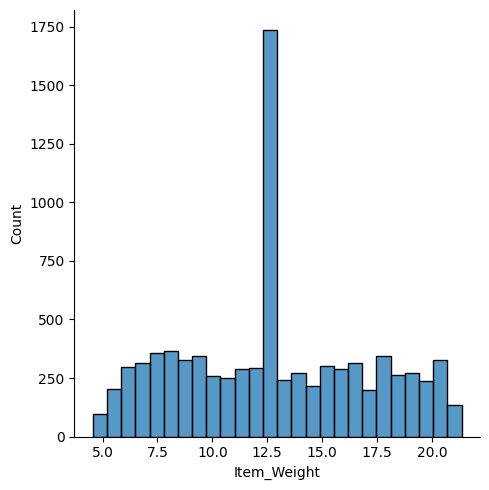

In [23]:
plt.figure(figsize = (6,6))
sns.displot(mart_sale_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

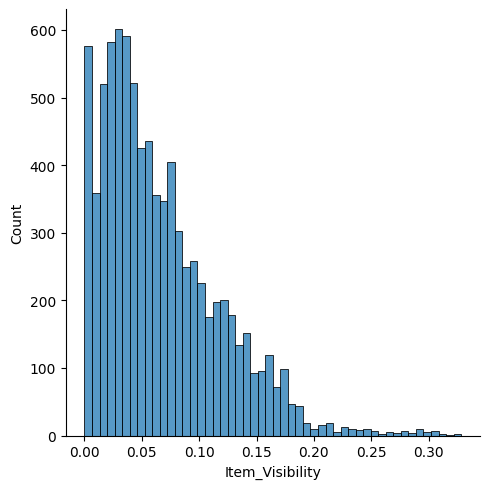

In [24]:
plt.figure(figsize = (6,6))
sns.displot(mart_sale_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

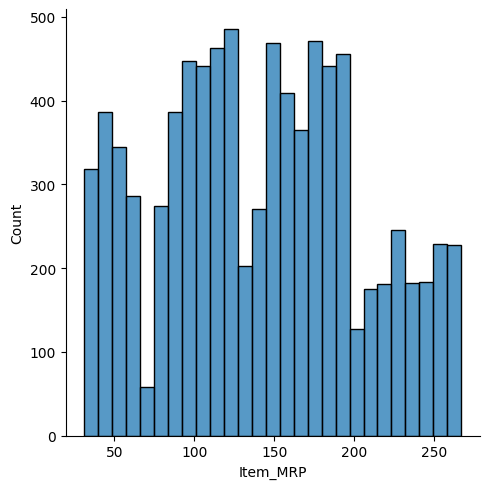

In [25]:
plt.figure(figsize = (6,6))
sns.displot(mart_sale_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

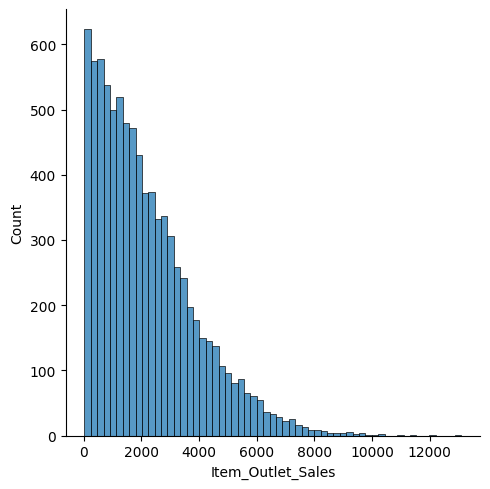

In [27]:
plt.figure(figsize = (6,6))
sns.displot(mart_sale_data['Item_Outlet_Sales'])
plt.show()

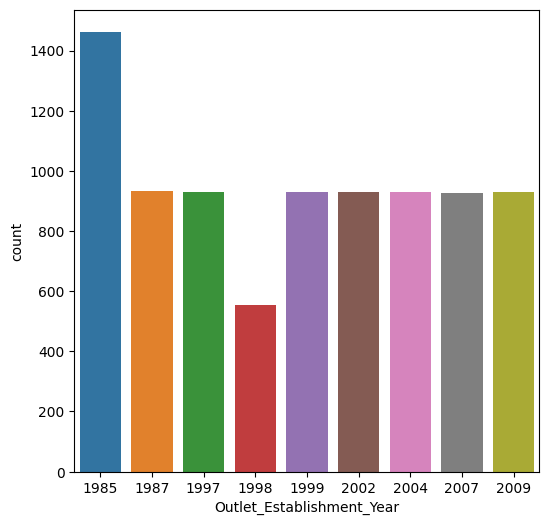

In [36]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year',data = mart_sale_data)
plt.show()

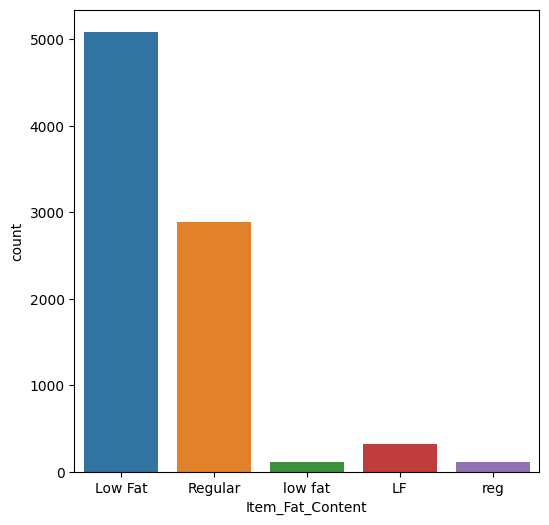

In [35]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content',data = mart_sale_data)
plt.show()

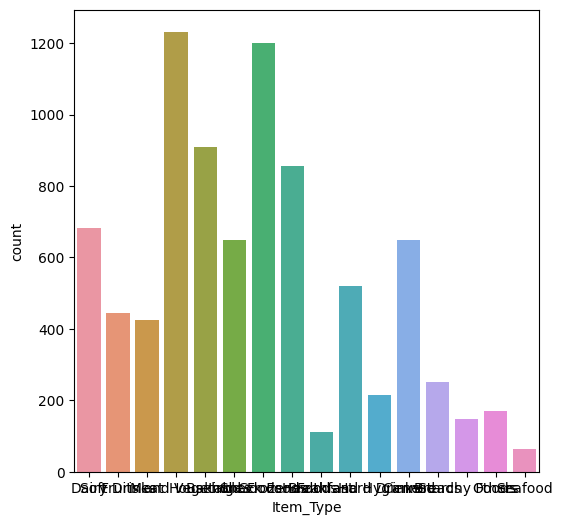

In [33]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Type',data = mart_sale_data)
plt.show()

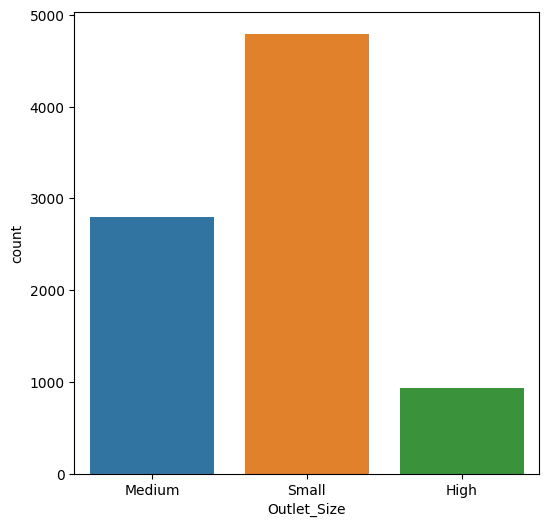

In [38]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Size',data = mart_sale_data)
plt.show()

In [39]:
#data preprocessing
mart_sale_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
mart_sale_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [43]:
mart_sale_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True )

In [44]:
mart_sale_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
#label codeing

encoder = LabelEncoder()

mart_sale_data['Item_Identifier'] = encoder.fit_transform(mart_sale_data['Item_Identifier'])
mart_sale_data['Item_Fat_Content'] = encoder.fit_transform(mart_sale_data['Item_Fat_Content'])
mart_sale_data['Item_Type'] = encoder.fit_transform(mart_sale_data['Item_Type'])
mart_sale_data['Outlet_Identifier'] = encoder.fit_transform(mart_sale_data['Item_Identifier'])
mart_sale_data['Outlet_Establishment_Year'] = encoder.fit_transform(mart_sale_data['Outlet_Establishment_Year'])
mart_sale_data['Outlet_Size'] = encoder.fit_transform(mart_sale_data['Outlet_Size'])
mart_sale_data['Outlet_Location_Type'] = encoder.fit_transform(mart_sale_data['Outlet_Location_Type'])
mart_sale_data['Outlet_Type'] = encoder.fit_transform(mart_sale_data['Outlet_Type'])

In [47]:
#spliting and target

x = mart_sale_data.drop(columns = 'Item_Outlet_Sales',axis = 1)
y = mart_sale_data['Item_Outlet_Sales']
print(x)
print(y)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4 

In [48]:
#training 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [49]:
#Machine Learing Model  xgboost
regressor = XGBRegressor()

regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
#prediction training 

training_data_prediction = regressor.predict(x_train)
print(training_data_prediction)

[2223.2979 2638.034  3328.2886 ... 2874.53   1696.0966 2410.9758]


In [51]:
#squared value

r2_train  = metrics.r2_score(y_train,training_data_prediction)
print(r2_train)

0.8549321327034759


In [52]:
#prediction test

test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)


r2_test  = metrics.r2_score(y_test,test_data_prediction)
print(r2_test)

[2329.4802 3162.3857 1641.3666 ... 3046.2207 2264.4846 3884.891 ]
0.537557231685968


In [54]:
#Machine Learing Model  xgboost
from sklearn.ensemble import RandomForestRegressor

regressor2 = RandomForestRegressor()

regressor2.fit(x_train,y_train)

training_data_prediction2 = regressor.predict(x_train)
print(training_data_prediction2)


r2_training2  = metrics.r2_score(y_train,training_data_prediction)
print(r2_training2)

#prediction test

test_data_prediction2 = regressor.predict(x_test)

r2_test2 = metrics.r2_score(y_test,test_data_prediction)
print(r2_test2)

[2223.2979 2638.034  3328.2886 ... 2874.53   1696.0966 2410.9758]
0.8549321327034759
0.537557231685968
